#### Implementing Linear Regression

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

Create Dummy Data X and y

In [47]:
np.random.seed(42)  # for reproducibility
X = 2 * np.random.rand(50, 2)  # 100 samples, 2 features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(50)  # y = 4 + 3*X1 + 5*X2 + noise
y = y.reshape(-1, 1)  # Reshape y to be a column vector

In [48]:
X.shape

(50, 2)

In [70]:
y.shape

(50, 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("X Train Shape:",X_train.shape)
print("X Test Shape:",X_test.shape)


X Train Shape: (40, 2)
X Test Shape: (10, 2)


Define the model equation - 

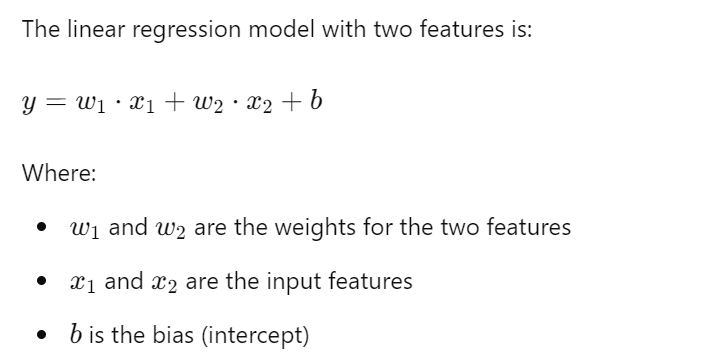

Inference Function  

In [52]:
def predict(X, w, b):
    return np.dot(X, w) + b


Define the cost function for training the model -

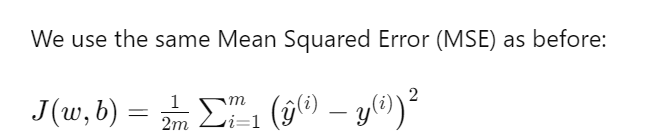

In [53]:
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = predict(X, w, b)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost


Define gradient descent algo for optimizing the weights and bias

![Screenshot 2024-08-13 174239.png](<attachment:Screenshot 2024-08-13 174239.png>)
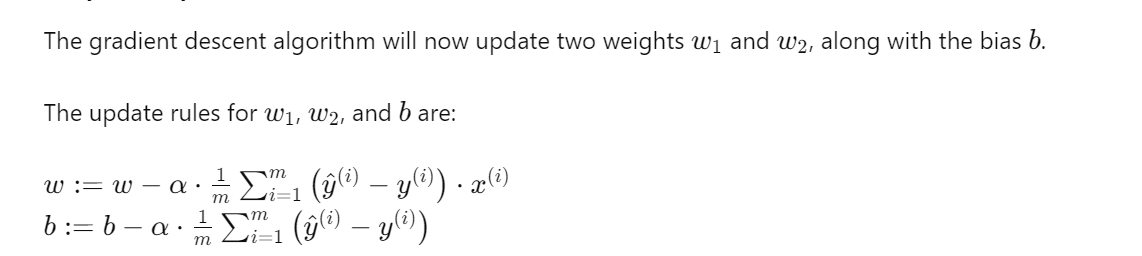

In [54]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    
    for i in range(num_iterations):
        # Calculate predictions (y_pred)
        y_pred = predict(X, w, b)
        
        # Calculate the gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        # Update the weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Optionally print the cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b


Training Model -  Initialize Parameters and Run Gradient Descent 

In [59]:
# Initialize parameters
w = np.random.randn(2, 1)  # Initialize w randomly (2 features)
b = 0  # Initialize b to 0

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
w, b = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

print("*"*50)
print(f"Final weights: {w}")
print("*"*50)
print(f"Final bias: {b}")


Iteration 0: Cost = 57.362209730748035
Iteration 100: Cost = 0.7378791215020464
Iteration 200: Cost = 0.47474775555277554
Iteration 300: Cost = 0.4421041408775982
Iteration 400: Cost = 0.42840061137884133
Iteration 500: Cost = 0.42247129531501326
Iteration 600: Cost = 0.4198514114933916
Iteration 700: Cost = 0.4186502425782518
Iteration 800: Cost = 0.418065088252461
Iteration 900: Cost = 0.4177537886960272
**************************************************
Final weights: [[3.31154986]
 [4.79603149]]
**************************************************
Final bias: 3.9535091602676373


##### Make Predictions

In [64]:
# Make predictions
y_pred = predict(X_test, w, b)
print(f"predictions shape: {y_pred.shape}")

print(f"Predictions: {y_pred}")



predictions shape: (10, 1)
Predictions: [[10.20853766]
 [ 7.43908675]
 [ 9.13055462]
 [11.5870827 ]
 [18.1031847 ]
 [11.5166212 ]
 [18.75914465]
 [17.81028771]
 [11.01974145]
 [12.70722318]]


Calculate Mean Squared Error (MSE) to evaluate model's performance

In [66]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {round(mse,3)}")


Mean Squared Error (MSE): 0.824
